<center><h3><font color='#E95420'>Optimization Methods for Machine Learning</font></h3>
<center><h3><font color='#772953'>Homework 1</font></h3></center>
<br><br> 
<center><h4><font color='#333333'>Michele Cernigliaro</font></h4></center>
<center><h4><font color='#333333'>Francesco Russo</font></h4></center>
<br><br>

<center><h4><b><font color='#333333'>Question 1</font></b></h4></center>

You must construct a shallow **Feedforward Neural Network** (FNN) (one only hidden layer), either
a **MLP** or a **RBF** network, that provides the model $f(x)$. We denote by ***π*** the hyper-parameters of
the network to be settled by means of an heuristic procedure and ***ω*** the parameters to be settled
by minimizing the regularized training error.

<center><h4><b><font color='#333333'>Question 1.1)</font></b></h4>
___________________________________________________________________________________________________
</center>
<br><br>

We must construct a **MLP** (Multi Layer Perceptron)

In [1]:
import pandas as pd
import numpy as np

<center>
$\displaystyle{ f(x) = \sum_{j = 1}^N \left[v_j g \left(\sum_{i = 1}^2 w_{ji} \cdot x_i - b \right) \right] }$
<br><br>
\[\vec{x_1} = \begin{bmatrix}
x_{11} \\ ... \\ x_{1P}
\end{bmatrix}
\quad\quad
\vec{x_2} = \begin{bmatrix}
x_{21} \\ ... \\ x_{2P}
\end{bmatrix}
\quad\quad
\vec{y} = \begin{bmatrix}
y_{1} \\ ... \\ y_{P}
\end{bmatrix}
\quad\quad
\vec{\pi} = \begin{bmatrix}
N \\ \sigma \\ \rho
\end{bmatrix}
\quad\quad
\vec{\omega} = \begin{bmatrix}
v \\ w \\ b
\end{bmatrix}
\]
<br>
$\displaystyle{ g(t) = tanh(t) = \frac{e^{2 \sigma t} - 1}{e^{2 \sigma t} + 1} }$
<br><br>
$\displaystyle{ E(\omega; \pi) = \frac{1}{2P} \sum_{p = 1}^P \left[ f(x_p) - y_p \right]^2 + \rho \cdot ||\omega||^2 }$
<img src="FFNN.png">
</center>

In [2]:
file = pd.ExcelFile('dataPoints.xlsx')
df = file.parse('Foglio1')
df.head()

,x1,x2,y
0,-1.262271,0.746859,0.461002
1,-0.804355,0.937081,0.617336
2,-1.805674,0.738389,-0.053984
3,-0.888805,0.061711,1.943678
4,-1.667562,-0.534543,2.127070


In [3]:
X = np.array(df[['x1', 'x2']])
X = np.append(X, -1 * np.ones((X.shape[0], 1)), axis=1)
y_true = np.array(df[['y']]).reshape(1, -1)

In [4]:
y_true.shape

(1, 300)

In [5]:
def g_fun(X):
    return np.tanh(X)

def fun(X, omega):
    # extract param vectors from omega
    v = omega[0:N].reshape(1, N)
    W = omega[N:3*N].reshape(N, n)
    b = omega[3*N:].reshape(N, 1)
    
    # merge W with b
    W = np.append(W, b, axis=1)
    
    return np.dot(v, g_fun(np.dot(W, np.transpose(X))))
    

In [6]:
#np.random.seed(123) # seed (for reprudecebility)


N = 10           # number of neurons in hidden layer
n = X.shape[1] - 1   # number of independent variables

# parameters initialization
W = np.random.random((N,n))
b = np.random.random((N,1))
v = np.random.random((N,1))

#print(v, "\n")
#print(W, "\n")
#print(b, "\n", '-------------------')

# all the parameters
omega = np.concatenate((v, W.reshape(N*n,1), b))

#print(omega[0:N].reshape(1, N),'\n')
#print(omega[N:3*N].reshape(N, X.shape[1]),'\n')
#print(omega[3*N:].reshape(N, 1))

In [7]:
fun(X, omega).shape

(1, 300)

In [8]:
def loss(omega):
    y_pred = fun(X, omega)
    return (np.sum((y_pred - y_true)**2) + rho * np.linalg.norm(omega)**2) / (2 * len(y_pred))

In [9]:
rho = 0.0005
rho

0.0005

In [10]:
loss(omega)

1894.640698053225

In [11]:
from scipy.optimize import minimize as minimize

In [12]:
q = minimize(loss, omega)

In [13]:
q

      fun: 0.12896971935421786
 hess_inv: array([[ 1.57084529e+02, -1.52905621e+01, -5.42149843e+01, ...,
         2.32011938e+00,  7.06151623e+00, -5.84017968e+00],
       [-1.52905620e+01,  8.46766061e+02, -3.48256106e+02, ...,
        -8.43400353e+00,  6.67678015e+01, -8.93161459e+00],
       [-5.42149843e+01, -3.48256106e+02,  7.27216955e+02, ...,
         6.48617650e+00,  4.70746525e+01, -3.35253145e+00],
       ...,
       [ 2.32011938e+00, -8.43400353e+00,  6.48617651e+00, ...,
         1.37126565e+00, -2.21269163e+00, -7.08478779e-01],
       [ 7.06151623e+00,  6.67678015e+01,  4.70746525e+01, ...,
        -2.21269163e+00,  8.96655922e+01, -3.98196709e+00],
       [-5.84017969e+00, -8.93161458e+00, -3.35253145e+00, ...,
        -7.08478779e-01, -3.98196710e+00,  2.32690319e+01]])
      jac: array([-2.05237418e-04, -1.32817775e-04, -2.49741599e-04,  1.20643526e-05,
        2.34283507e-04,  2.93368474e-04,  1.64553523e-04, -1.30347908e-04,
       -2.44040042e-04, -1.57980248e-04,

In [14]:
q.x

array([ 4.11161859e+00, -7.90252122e+00, -8.08175635e+00,  3.32989222e+00,
       -2.02091519e+00, -2.96864285e+00,  1.73026798e+00, -3.12377527e+00,
        3.80831470e+00,  3.07352681e+00, -3.85259258e+00,  1.57779493e-03,
       -5.86880280e-01,  2.58988282e-01,  6.22699224e-01, -2.39242489e-01,
        6.33914062e-02, -1.00975581e+00,  1.23506608e-02,  4.12984053e+00,
       -1.56379923e+00, -3.13232556e-02,  1.05835222e-02,  2.00709148e+00,
        1.53998069e+00,  1.83363044e-02,  3.86807553e+00,  3.59925676e-03,
        2.94765291e-02,  3.30135387e+00,  7.94877856e+00,  1.53949001e+00,
        1.57681471e+00, -6.79577999e-01, -4.37063695e+00, -1.02039282e+00,
       -7.20429078e-01, -9.94574951e-01,  7.90481558e+00,  3.47686227e+00])

In [15]:
v_0 = omega[0:N].reshape(1, N)
W_0 = omega[N:3*N].reshape(N, n)
b_0 = omega[3*N:].reshape(N, 1)

In [16]:
print(v_0, "\n")
print(W_0, "\n")
print(b_0, "\n")

[[0.95830569 0.1468328  0.25477247 0.4193662  0.3290161  0.31108297
  0.44132009 0.68295453 0.83675943 0.95269807]] 

[[0.12748621 0.49785367]
 [0.15992361 0.15793929]
 [0.76337147 0.22226036]
 [0.19314136 0.10546582]
 [0.39953587 0.68575109]
 [0.1806177  0.74989774]
 [0.26519609 0.65503411]
 [0.16244895 0.96200355]
 [0.73072819 0.6236914 ]
 [0.84393777 0.74906562]] 

[[0.45798993]
 [0.55124592]
 [0.44222527]
 [0.38108693]
 [0.96299483]
 [0.14950902]
 [0.25403044]
 [0.4393232 ]
 [0.25609044]
 [0.21405903]] 



In [17]:
v = q.x[0:N].reshape(1, N)
W = q.x[N:3*N].reshape(N, n)
b = q.x[3*N:].reshape(N, 1)

print(v, "\n")
print(W, "\n")
print(b, "\n")

[[ 4.11161859 -7.90252122 -8.08175635  3.32989222 -2.02091519 -2.96864285
   1.73026798 -3.12377527  3.8083147   3.07352681]] 

[[-3.85259258e+00  1.57779493e-03]
 [-5.86880280e-01  2.58988282e-01]
 [ 6.22699224e-01 -2.39242489e-01]
 [ 6.33914062e-02 -1.00975581e+00]
 [ 1.23506608e-02  4.12984053e+00]
 [-1.56379923e+00 -3.13232556e-02]
 [ 1.05835222e-02  2.00709148e+00]
 [ 1.53998069e+00  1.83363044e-02]
 [ 3.86807553e+00  3.59925676e-03]
 [ 2.94765291e-02  3.30135387e+00]] 

[[ 7.94877856]
 [ 1.53949001]
 [ 1.57681471]
 [-0.679578  ]
 [-4.37063695]
 [-1.02039282]
 [-0.72042908]
 [-0.99457495]
 [ 7.90481558]
 [ 3.47686227]] 



In [18]:
loss(omega)

1894.640698053225

In [19]:
loss(q.x)

0.12896971935421786

In [20]:
loss(q.x)

0.12896971935421786

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def saddle(X):
    x = X[0]
    y = X[1]
    return x**2-y**2

def plotting(funzione, title='Plotting of the function'): #if you do not provide a title, 'Plotting...' will be used
    #create the object
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    #create the grid
    x = np.linspace(-2, 2, 50).reshape(-1, 1) #create 50 points between [-5,5] evenly spaced  
    y = np.linspace(-1, 1, 50).reshape(-1, 1)
    X = np.append(x,y, axis=1)
    
    X = np.append(X, -1*np.ones((X.shape[0],1)), axis=1)
    
    Z = funzione(X, q.x) #evaluate the function (note that X,Y,Z are matrix)


    ax.plot_surface(x, y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    plt.show()

    return

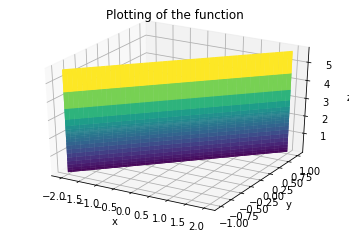

In [31]:
plotting(fun)

<center><h4><b><font color='#333333'>Question 1.2)</font></b></h4>
___________________________________________________________________________________________________
</center>
<br><br>

We must now construct a **RBF** (Radial Basis Function) neural network

<center>
$\displaystyle{ f(x) = \sum_{j = 1}^N \left[v_j \phi \left(||\vec{x} - \vec{c}_j ||\right) \right] }$
<br><br>
\[\vec{x_1} = \begin{bmatrix}
x_{11} \\ ... \\ x_{1P}
\end{bmatrix}
\quad\quad
\vec{x_2} = \begin{bmatrix}
x_{21} \\ ... \\ x_{2P}
\end{bmatrix}
\quad\quad
\vec{y} = \begin{bmatrix}
y_{1} \\ ... \\ y_{P}
\end{bmatrix}
\quad\quad
\vec{\pi} = \begin{bmatrix}
N \\ \sigma \\ \rho
\end{bmatrix}
\quad\quad
\vec{\omega} = \begin{bmatrix}
v \\ c
\end{bmatrix}
\]
<br>
$\displaystyle{ \phi(||\vec{x} - \vec{c}||) = e^{\displaystyle{\frac{||\vec{x} - \vec{c}||^2}{\sigma^2}}}}$
<br><br>
$\displaystyle{ E(\omega; \pi) = \frac{1}{2P} \sum_{p = 1}^P \left[ f(x_p) - y_p \right]^2 + \rho \cdot ||\omega||^2 }$
<img src="RBF.png">
</center>